<a href="https://colab.research.google.com/github/ioannis-toumpoglou/tensorflow-developer-repo/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem. A simple one is: predicting a numerical variable based on a combination of some other variables.

In [60]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

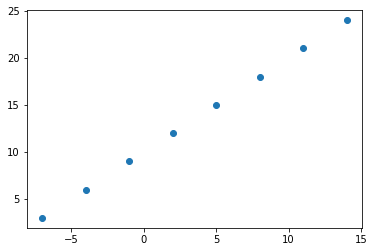

In [61]:
import numpy as np
import matplotlib as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.pyplot.scatter(X, y)

In [62]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [63]:
# Create a demo Tensor for a housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [64]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [65]:
X[0].ndim

0

In [66]:
X[0], y[0]

(-7.0, 3.0)

In [67]:
# Turn the NumPy arrays into Tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [68]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

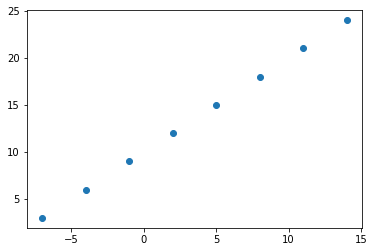

In [69]:
plt.pyplot.scatter(X, y)

## Steps in Modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (the function that shows how wrong the model is), the optimizer (tells the model how to improve) and the evaluation metrics (what can be used to interpret the perfomance of the model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [70]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # One input to one output value relationship                      
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
              metrics=['mae'])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 268ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [71]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [72]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving the Model
A model can be improved by altering the steps taken in the model creation.
1. **Creating a model** - add more layers, increase the number of hidden units (neurons) within each of the hidden layers or change the activation function of each layer.
2. **Compiling a model** - change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - fit the model for more epochs (longer training) or on more data (more examples to learn from).

In [73]:
## Rebuild the Model -> more epochs
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # One input to one output value relationship                   
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
              metrics=['mae'])
# 3. Fit the model (this time more epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 284ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [74]:
# Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [75]:
# Has the Model's prediction improved?
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [76]:
# Another try to improve the Model
## Rebuild the Model -> use an additional layer (relu)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1) # One input to one output value relationship                   
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
              metrics=['mae'])
# 3. Fit the model (this time more epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 496ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 23ms/step -

In [77]:
# Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [78]:
# Has the Model's prediction improved?
model.predict([17.0])

array([[31.223137]], dtype=float32)

Even though the loss and mae decreased, the distance from the target (27) increased. This means that the Model is overfitting.

In [79]:
# Another try to improve the Model
## Rebuild the Model -> changes in additional layer and optimizer
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1) # One input to one output value relationship                   
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), # Adam
              metrics=['mae'])
# 3. Fit the model (this time more epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 748ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 8.6482 - mae: 8.6482
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 7.9571 - mae: 7.9571
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 7.8942 - mae: 7.8942
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 6.5620 - mae: 6.5620
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 6.1262 - mae: 6.1262
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 6.1712 - mae: 6.1712
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 5.5256 - mae: 5.5256
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 4.8985 - mae: 4.8985
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 4.7671 - mae: 4.7671
Epoch 11/100
1/1 [==============================] - 0s 21ms/step -

In [80]:
# Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [81]:
# Has the Model's prediction improved?
model.predict([17.0])

array([[25.192825]], dtype=float32)

## Evaluating a Model
Typical workflow when building Neural Networks
Build -> Fit -> Evaluate -> Tweak -> Fit -> Evaluate -> Tweak -> ...

When it comes to evaluation:
> Visualize, visualize, visualize

It is a good idea to visualize:
1. The data - what kind of data are we working with? what does it look like?
2. The model - what does the model look like?
3. The training of the model - how does it perform when it learns?
4. The predictions of the model - how do they line up against the original labels?

In [82]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [83]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

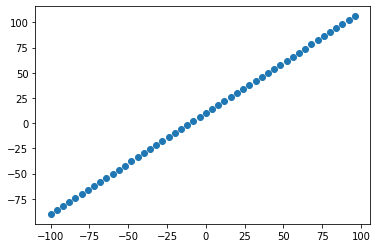

In [84]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The three sets


*   **Training set** - the model learns from this data, typically 70-80% of the available data
*   **Validation set** - the model gets tuned on this data, typically 10-15% of the data
*   **Test set** - the model gets evaluated on this data, typically 10-15% of the data





In [85]:
# Check the length of the samples
len(X)

50

In [86]:
# Split the data into train and test sets
X_train = X[:40] # First 40 samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # Last 10 samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

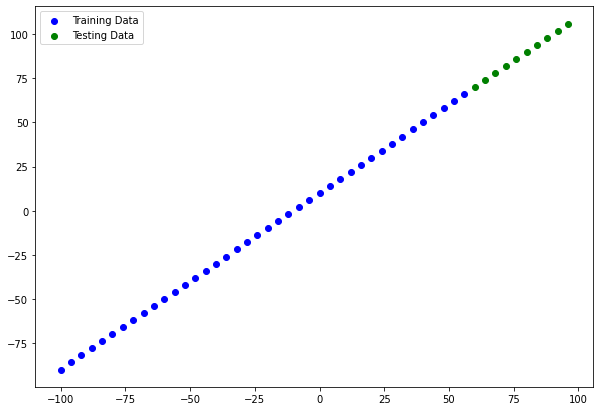

In [87]:
### Visualizing the data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.legend();

In [90]:
# Build a neural network for the data

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [92]:
model.summary()

ValueError: ignored

In [94]:
# Create a model that builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [95]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params -> total number of parameters in the model
* Trainable params -> the parameters (patterns) the model can update as it trains
* Non-trainable params -> the paramaters the model doesn't update as it trains (this is typical when parameters are brought from another model during **transfer learning**)

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layers, check out MIT's introduction to Deep Learning video

https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI

In [96]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)